## 1. Dataset and Objective

Dataset : A Medical Insurance Company Has Released Data For Almost 1000 Customers.  The Premium Price Is In INR(₹) Currency And Showcases Prices For A Whole Year. https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction?select=Medicalpremium.csv

Objective : *Memprediksi Harga Premi Asuransi Kesehatan menggunakan Model Supervised learning Regresi (KNeighborsRegressor, SVR, GradientBoostRegressor, RandomForestRegressor, DecisionTreeRegressor), menentukan model yang terbaik, dan deploy model terbaik tersebut*


| Column | Description |
| --- | --- |
| `Age` | Customer's age |
| `Diabetes` | Whether The Person Has Abnormal BloodSugar <br> `0` = no <br> `1` = yes |
| `BloodPressureProblems` | Whether The Person Has Abnormal Blood Pressure Levels <br> `0` = no <br> `1` = yes |
| `AnyTransplants` | Any Major Organ Transplants <br> `0` = no <br> `1` = yes |
| `AnyChronicDiseases` |Whether Customer Suffers From Chronic Ailments Like Asthama, Etc <br> `0` = no <br> `1` = yes |
| `Height` | Height Of Customer |
| `Weight` | Weight Of Customer |
| `KnownAllergies` | Whether The Customer Has Any Known Allergies <br> `0` = no <br> `1` = yes |
| `HistoryOfCancerInFamily` | Whether Any Blood Relative Of The Customer Has Had Any Form Of Cancer <br> `0` = no <br> `1` = yes |
| `NumberOfMajorSurgeries` | The Number Of Major Surgeries That The Person Has Had |
| `PremiumPrice` | Price of The Health Insurance |

## 2. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature engineering
from sklearn.model_selection import train_test_split
from scipy.stats import kendalltau
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Saving
import pickle
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading
   

DATA LOADING DAN COPY

In [2]:
# Data Loading simpan dalam df0
df0 = pd.read_csv('Medicalpremium.csv')

# Duplicate dataset dalam df
df = df0.copy()

DATA CHECK

In [3]:
# Cek info dataset
df.info()

# Menampilkan 3 baris pertama dataset
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000


Dari dataset tersebut dapat diambil informasi:
- 986 data
- 11 kolom numerik dengan data tipe integer
- tidak ada data null
- tidak perlu adanya perubahan format data

In [4]:
# Cek kolom yang memiliki missing value 
missing_values = df.isnull().sum()
print(f'column with missing value:' , missing_values [missing_values>0])


column with missing value: Series([], dtype: int64)


tidak terdapat data null, tidak perlu ada tindakan lanjut

In [5]:
# Cek duplicate data
duplicate_rows = df.duplicated().sum()
print(f'total of duplicate row:' , duplicate_rows)

#df_duplicate = df.drop_duplicate(inplace=True)

total of duplicate row: 0


tidak ada baris yang duplicate, maka tidak perlu ada tindakan lanjut,
setelah ini kita akan menyesuaikan format data dan hanya ada satu format data yang tidak sesuai

## 4. Exploratory Data Analysis (EDA)

1. Bagaimana perbandingan Harga Premi Asuransi dengan Usia tertanggung?

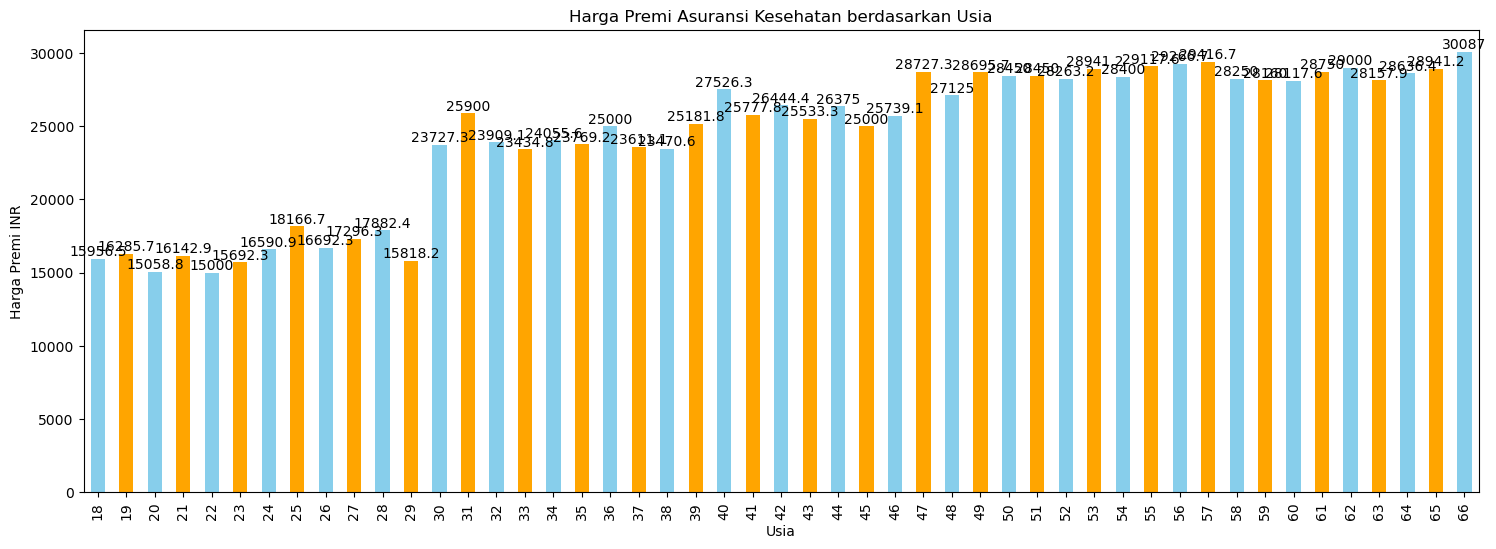

In [6]:
# Diagram Batang
fig,ax1 = plt.subplots(figsize=(18,6))
age = df.groupby('Age')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Usia')
plt.ylabel('Harga Premi INR')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Usia')
age.bar_label(age.containers[0])

# Plot
plt.show()

Dari grafik ini terlihat bahwa Usia mempengaruhi harga rata - rata premi Asuransi Kesehatan, semakin besar nilai premi tertanggung dikarenakan usia tertanggung lebih tua

2. Bagaimana perbandingan Harga Premi Asuransi dengan Riwayat Cancer di Keluarga

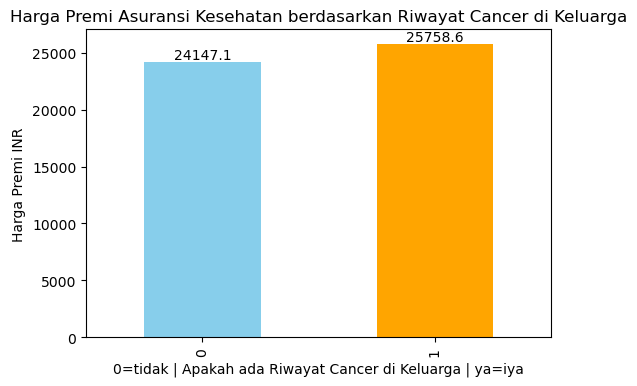

In [7]:
# Diagram Batang
fig,ax1 = plt.subplots(figsize=(6,4))
cancer = df.groupby('HistoryOfCancerInFamily')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('0=tidak | Apakah ada Riwayat Cancer di Keluarga | ya=iya')
plt.ylabel('Harga Premi INR')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Riwayat Cancer di Keluarga')
cancer.bar_label(cancer.containers[0])

# Plot
plt.show()

Harga rata - rata premi untuk tertanggung yang memiliki riwayat Cancer di keluarga jauh lebih besar daripada yang tidak memiliki riwayat cancer di keluarga

3. Bagaimana perbandingan Harga Premi Asuransi dengan Riwayat Penyakit Akut?

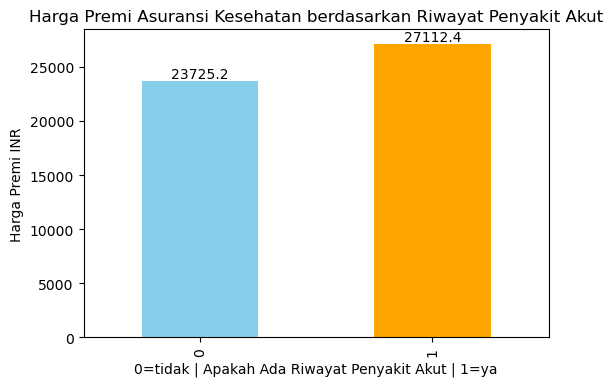

In [8]:
# Diagram Batang
fig,ax1 = plt.subplots(figsize=(6,4))
disease = df.groupby('AnyChronicDiseases')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('0=tidak | Apakah Ada Riwayat Penyakit Akut | 1=ya')
plt.ylabel('Harga Premi INR')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Riwayat Penyakit Akut')
disease.bar_label(disease.containers[0])

# Plot
plt.show()

Harga rata - rata premi untuk tertanggung yang memiliki riwayat penyakit akut seperti asma jauh lebih besar daripada yang tidak memiliki riwayat penyakit akut

4. Bagaimana perbandingan Harga Premi Asuransi dengan Riwayat Transplantasi Organ?

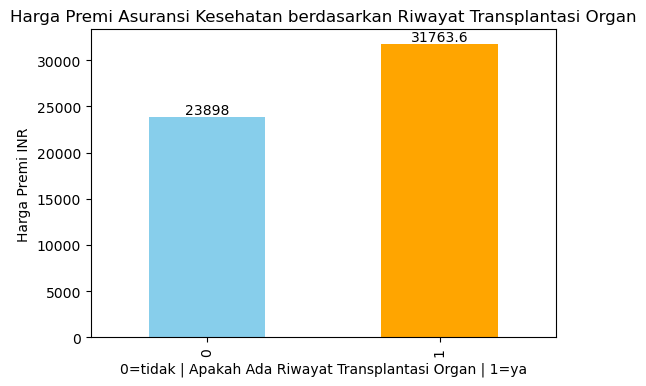

In [9]:
# Diagram Batang
fig,ax1 = plt.subplots(figsize=(6,4))
transplants = df.groupby('AnyTransplants')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('0=tidak | Apakah Ada Riwayat Transplantasi Organ | 1=ya')
plt.ylabel('Harga Premi INR')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Riwayat Transplantasi Organ')
transplants.bar_label(transplants.containers[0])

# Plot
plt.show()

Harga rata - rata premi untuk tertanggung yang memiliki riwayat transplantasi organ jauh lebih besar daripada yang tidak ada riwayat transplantasi organ 

5. Bagaimana perbandingan Harga Premi Asuransi dengan Frekuensi Operasi Besar?

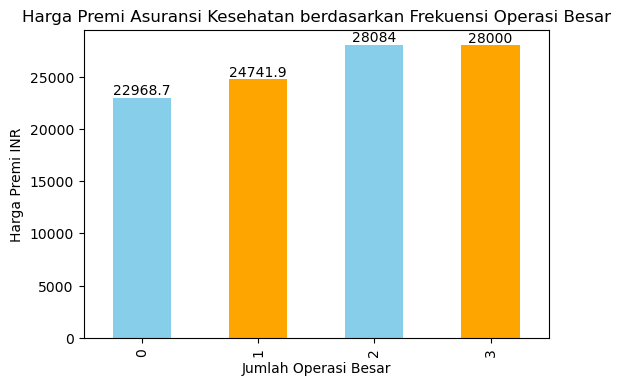

In [10]:
# Diagram Batang
fig,ax1 = plt.subplots(figsize=(6,4))
surgery = df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('Jumlah Operasi Besar')
plt.ylabel('Harga Premi INR')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Frekuensi Operasi Besar')
surgery.bar_label(surgery.containers[0])

# Plot
plt.show()

- Riwayat operasi besar mempengaruhi harga premi asuransi tertanggung
- Semakin banyaknya operasi yang telah dilalui maka semakin besar harga premi tertanggung

6. Bagaimana perbandingan Harga Premi Asuransi dengan Penyakit Tekananan Darah?

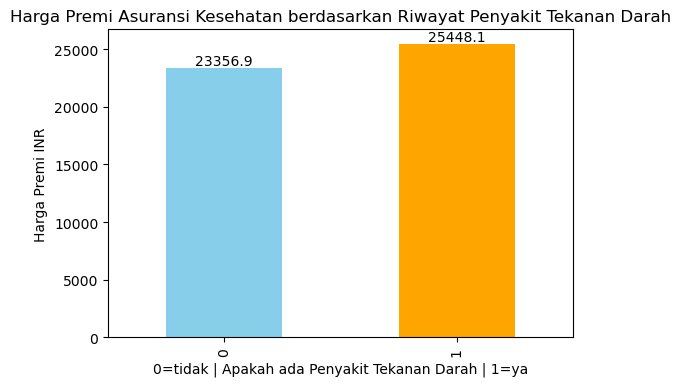

In [11]:
# Diagram Batang
fig,ax1 = plt.subplots(figsize=(6,4))
blood = df.groupby('BloodPressureProblems')['PremiumPrice'].mean().plot(kind='bar', color=['skyblue', 'orange'], ax=ax1)

plt.xlabel('0=tidak | Apakah ada Penyakit Tekanan Darah | 1=ya')
plt.ylabel('Harga Premi INR')
plt.title('Harga Premi Asuransi Kesehatan berdasarkan Riwayat Penyakit Tekanan Darah')
blood.bar_label(blood.containers[0])

# Plot
plt.show()

Harga rata - rata premi untuk tertanggung yang memiliki riwayat penyakit tekanan darah tinggi jauh lebih besar daripada yang tidak ada riwayat penyakit tekanan darah tinggi

7. Apakah ada hubungan korelasi antara Usia, Harga Premi, dan Transplantasi Organ ?

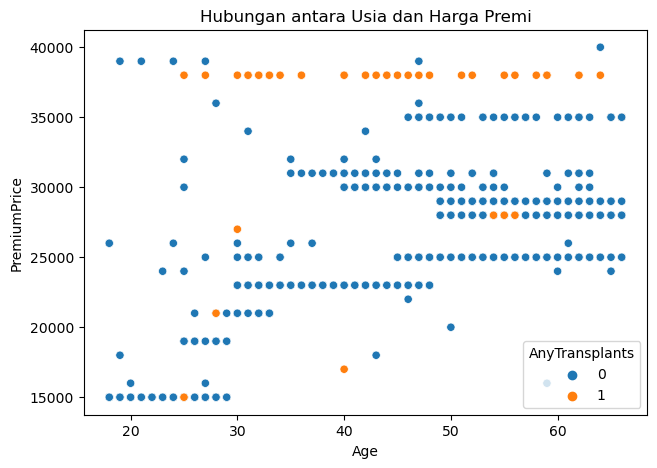

In [12]:
# Scatter plot hubungan usia dan premi
plt.figure(figsize = (16,5))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='PremiumPrice', hue= 'AnyTransplants', data=df)
plt.title('Hubungan antara Usia dan Harga Premi')

# Plot
plt.show()

- Usia berkolerasi linier dengan Harga Premium
- Adanya Transplantasi Organ membuat harga premi tertanggung jauh lebih mahal walaupun usia tertanggung masih muda

## 5. Feature Engineering

### 5.a. Split Fitur dan Target

In [13]:
data = df.copy()

Sebelum memulai Feature Engineering diperlukan mengamankan dataset dimana dataset yang ada terlebih dahulu dipisahkan antara Fitur dan Target. Hal ini diperlukan supaya tidak ada data yang leak / bocor. Dataset yang tidak memiliki Null dan Duplicate dipisahkan antara kolom fitur dan kolom target yang disimpan dalam X dan y.

In [14]:
# Memisahkan antara 'X' (fitur) dan 'y' (target)

X = data.drop(['PremiumPrice'], axis=1)
y = data['PremiumPrice']

# Menampilkan data Fitur
X.head(3)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1


Dengan data yang kita punya saat ini, kedepannya kita ingin memprediksi berapa kah harga premi asuransi kesehatan, maka dari itu ditentukan bahwa target ialah PremiumPrice sedangkan kolom - kolom yang lainnya ialah kolom fitur yang mempengaruhi kolom target tersebut

### 5.b. Split Data train dan Data test

In [15]:
# Memisahkan antara data-train dan data-test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

print('X Train Size' , X_train.shape)
print('X Test Size' , X_test.shape)
print('y Train size', y_train.shape)
print('y Test size', y_test.shape)

X Train Size (788, 10)
X Test Size (198, 10)
y Train size (788,)
y Test size (198,)


Setelah memisahkan antara data Fitur dan data Target, tahap selanjutnya yaitu memisahkan Data Fitur kemudian dibagi menjadi data Fitur untuk train dan test begitupula Data Target untuk train dan test, dimana kali ini memilih 20% data untuk test dan memilih lebih banyak data untuk dilatih, sehingga 80% untuk data train, menggunakan random state 100 agar datanya tidak berubah - ubah.

*internal note: tidak perlu balancing data, dikarenakan pada case ini kita memprediksi harga menggunakan model regresi, bukan menggunakan model klasifikasi yang perlu mengecek keseimbangan kolom target*

### 5.c. Handling Cardinality

In [16]:
# Cek Cardinality

# List berdasarkan kolom, jumlah nilai unique kolom, dan nilai unique kolomnya dari dataset yang ada

listdf = []
for col in X:
    listdf.append([col, X[col].nunique(), X[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data = listdf)

,nama kolom,jumlah nilai unique,nilai unique
0,Age,49,"[45, 60, 36, 52, 38, 30, 33, 23, 48, 66, 24, 4..."
1,Diabetes,2,"[0, 1]"
2,BloodPressureProblems,2,"[0, 1]"
3,AnyTransplants,2,"[0, 1]"
4,AnyChronicDiseases,2,"[0, 1]"
5,Height,44,"[155, 180, 158, 183, 166, 160, 150, 181, 169, ..."
6,Weight,74,"[57, 73, 59, 93, 88, 69, 54, 79, 74, 67, 97, 7..."
7,KnownAllergies,2,"[0, 1]"
8,HistoryOfCancerInFamily,2,"[0, 1]"
9,NumberOfMajorSurgeries,4,"[0, 1, 2, 3]"


Pada bagian ini kita akan mengecek jumlah nilai unique masing - masing kolom selain untuk mengecek cardinality dapat juga membantu untuk menilai kolom tersebut apakah termasuk numerikal atau kategorikal

Cardinality check :

- kolom *'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries',* termasuk kolom fitur kategorikal yang *low cardinality* sehingga tidak perlu handling. 

- kolom *'Age', 'Height', 'Weight'* termasuk kolom fitur numerikal.

### 5.d. Feature Selection
*Mencari korelasi antara kolom fitur Numerikal dengan kolom target 'PremiumPrice'*

<Axes: >

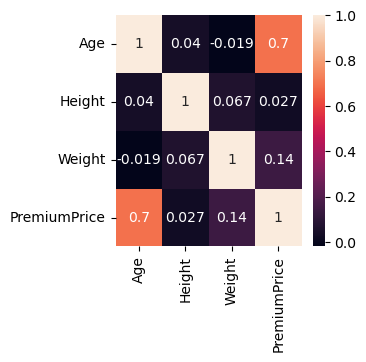

In [17]:
#mencari korelasi antara kolom fitur numerikal dengan target 'PremiumPrice'

Numeric = X[['Age', 'Height', 'Weight']]
Numeric['PremiumPrice'] = y

# Uji Pearson's
plt.figure(figsize=(3,3))
sns.heatmap(Numeric.corr(method='pearson'),annot=True)

dikarenakan datanya dalam bentuk numerikal mencari korelasi dapat menggunakan pearson dan terlihat bahwa kolom target 'PremiumPrice' ada hubungan dengan kolom fitur 'Age' dan 'Weight'

*Mencari korelasi antara kolom fitur Kategorikal dengan kolom target 'PremiumPrice'*

<Axes: >

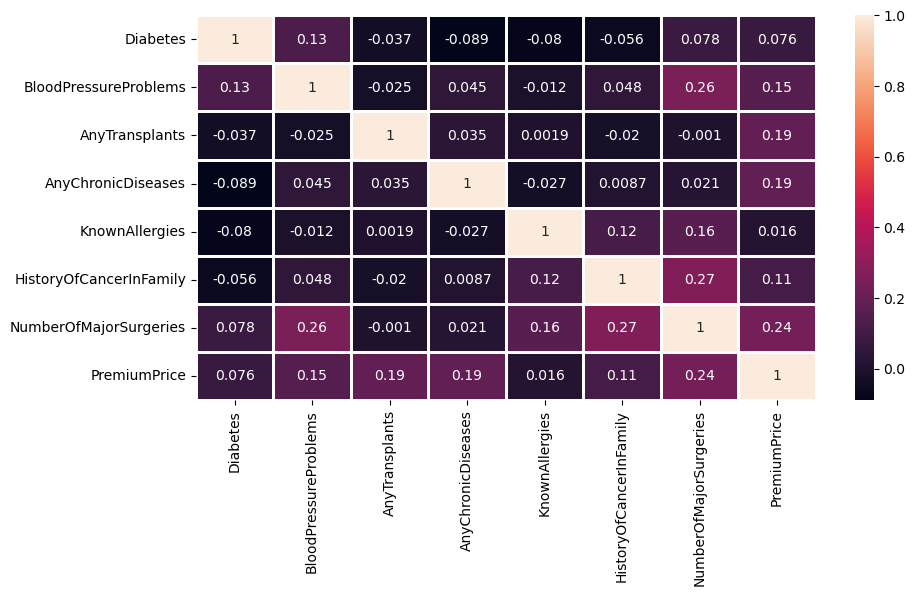

In [18]:
# Mendefinisikan kolom fitur kategorikal
category = X[['Diabetes','BloodPressureProblems','AnyTransplants','AnyChronicDiseases',
              'KnownAllergies','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]
category['PremiumPrice'] = y

# Uji Kendall
plt.figure(figsize=(10,5))
sns.heatmap(category.corr(method='kendall'),annot=True,linewidths="1")


- Untuk kolom kategorikal akan dicoba menggunakan kendall
- Dari hasil di atas dapat dilihat bahwa fitur kategorikal yang memiliki korelasi signifikan dengan 'PremiumPrice' ialah *'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'*

kolom lainnya yang pada tesnya tidak ada korelasinya dapat diabaikan maka selanjutnya akan di-coba define kembali kolom X_train dan X_test dengan kolom yang ada korelasinya dengan target

In [19]:
# Memilih Fitur yang ada korelasinya dengan Target

X_train = X_train[['Age', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]
X_test = X_test[['Age', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

In [20]:
# Mengecek dataset kolom X_train
X_train.head(3)

,Age,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Weight,HistoryOfCancerInFamily,NumberOfMajorSurgeries
501,26,0,0,1,73,0,1
637,41,1,0,1,67,0,0
424,61,1,0,0,56,1,2


### 5.e. Split Data Numerikal dan Data Kategorikal

In [21]:
# Memisahkan dataset train untuk kolom numerikal dan kolom kategorikal 

numeric  = X_train[['Age', 'Weight']]
category = X_train[['BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']]

kolom yang ada korelasinya di-define kembali yang mana termasuk kolom numerikal dan kategorikal yang selanjutnya akan di-handling berbeda dalam Feature Engineering.

Untuk numerikal akan dihandling dengan menghilangkan outliers kemudian scaling sedangkan untuk kolom kategorikal akan di-encoding yang kemudian kolom numerikal dan kategorikal tersebut akan disatukan kembali kedalam satu dataframe

### 5.f. Handle Outliers Data Numerikal  

In [22]:
# Mendeskripsikan dataset kolom, jumlah nilai unique kolom, dan nilai unique kolomnya dari dataset yang ada

listMean = []
for col in numeric:
  listMean.append([col, numeric[col].mean(), numeric[col].median(), 
                   numeric[col].mode()[0], numeric[col].skew(),numeric[col].kurtosis()])

pd.DataFrame(columns=['nama kolom', 'mean', 'median','mode','skew','kurtosis'], data=listMean)


,nama kolom,mean,median,mode,skew,kurtosis
0,Age,41.545685,42.0,42,0.047972,-1.133537
1,Weight,76.998731,75.0,73,0.679161,0.739044


- dari kolom numerikal diketahui kolom Age tidak ada outliers dikarenakan nilai skew nya masih dibawah 0.5 sedangkan untuk kolom Weight skewnya diatas 0.5 namun tidak extreme. 
- Untuk data distribusi normal akan tetap dihandling menggunakan winsorizer gaussian
- Untuk data skew dihandling menggunakan IQR namaun dikarenakan distribusi datanya tidak esktreme maka dihandling menggunakan fold 1.5

In [23]:
# Handle outlier dengan winsorizer
# Menggunakan 'Gaussian' untuk distribusi normal

winsorizer = Winsorizer(capping_method='gaussian', 
                tail='both', 
                fold=1.5, 
                variables=['Age'] )
X_train_capped0 = winsorizer.fit_transform(X_train)
X_train_capped0 = winsorizer.transform(X_train)


In [24]:
# Handle outlier dengan winsorizer
# Menggunakan IQR (skew tidak extreme menggunakan fold 1.5)

winsorizer = Winsorizer(capping_method='iqr', 
                tail='both', 
                fold=1.5, 
                variables=['Weight'])
X_train_capped = winsorizer.fit_transform(X_train_capped0) # menggunakan dataframe yang X_train_capped0 agar nilai proses sebelumnya tetap tersimpan
X_train_capped = winsorizer.transform(X_train_capped0)

In [25]:
# Fungsi untuk membuat plot histogram dan boxplot sebelum dan sesudah capping
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Age - Before Capping


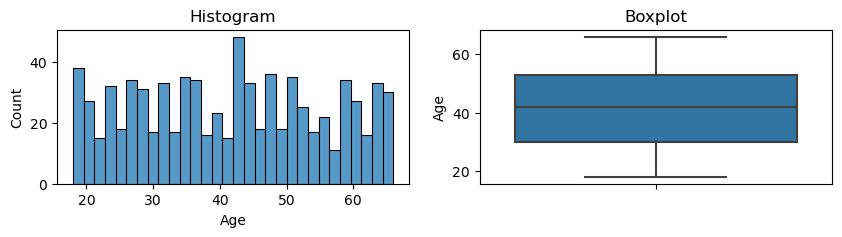


Age - After Capping


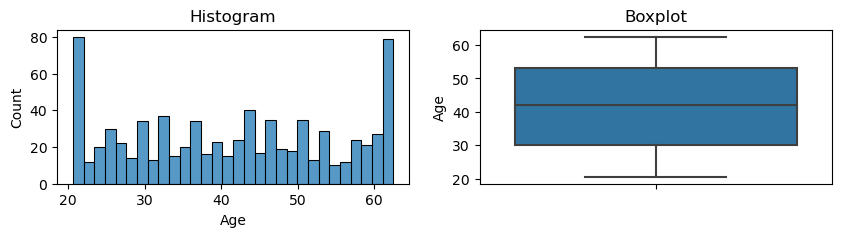

Weight - Before Capping


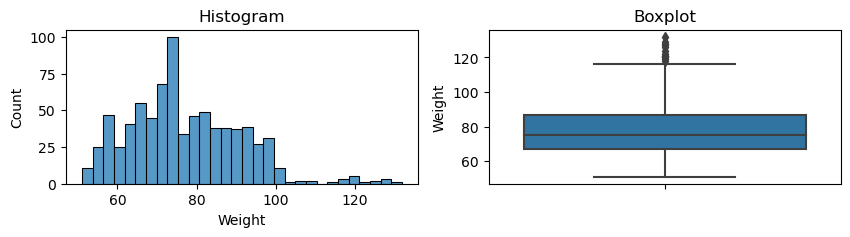


Weight - After Capping


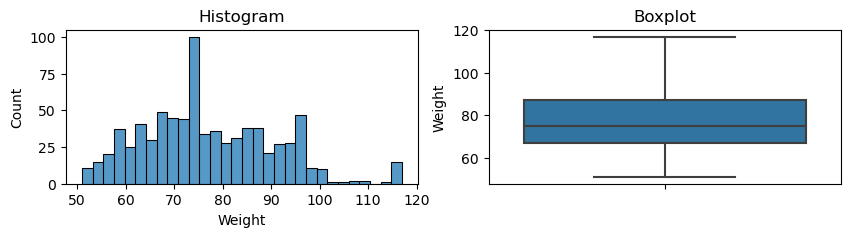

In [26]:
# show plot
for col in numeric:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

terlihat dari gambar, outliers telah berhasil di-capping

### 5.g. Check Multicollinearity

Dikarenakan kedepannya kita akan menggunakan salah satu model linier, misalnya: linear regression atau SVR dan model linier ini sangat sensitif terhadap fitur yang dapat berhubungan satu sama lainnya, maka kita perlu mengecek multicolinearity dan mendapatkan nilai VIF. 

Uji ini hanya bisa dilakukan jika data dalam kategori numerikal bukan kategorikal, dikarenakan datanya kategorikal yaitu dalam bentuk numeric binary (0 dan 1) maka yang akan diuji hanya data yang merupakan numeric continues

In [27]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
# Check Multicollinearity
calc_vif(X_train_capped[['Age', 'Weight']])

,variables,VIF
0,Age,7.964487
1,Weight,7.964487


Multicollinearity maksudnya ialah fitur lain tidak saling berhubungan dengan fitur lainnya, multicollinearity mencari apakah ada informasi yang sama atau tidak antara fitur. Dimana disini dilihat dari nilai VIF jika nilai VIF ada yang nilainya melebihi 10 akan kita drop kolomnya. 

Selain dengan mengetes multicollinearity melalui uji VIF, juga bisa didapatkan menggunakan PCA namun akan dilakukan dalam Column Transformer setelah memisahkan pipeline numerikal dan pipeline kategorikal serta setelah scaling dan encoding. 

### 5.h. Feature Scaling Data Numerikal & Feature Encoding Data Kategorikal 

- Feature Scaling
    - Data numerical yang telah dihilangkan outliernya akan discaling dengan Feature Scaling
    - Jika distribusi data skew scaling dapat menggunakan MinMaxScaler, data dengan distribusi normal scaling bisa menggunakan StandardScaler, menggunakan RobustScaler bisa digunakan untuk data dengan distribusi normal ataupun skew dimana robust tidak sensitif terhadap outlier

- Feature Encoding 
    - Data categorical akan melalui proses Feature Encoding, namun dalam case ini *tidak perlu dilakukan encoding* dikarenakan data sudah dalam bentuk numerik binary


#### Column Transformer dan Pipeline

In [29]:
# Define Numeric and Category
num = ['Age', 'Weight']
cat = ['BloodPressureProblems','AnyTransplants','AnyChronicDiseases','HistoryOfCancerInFamily','NumberOfMajorSurgeries']

# Define Scaler
scaler = RobustScaler()

# Define PCA (dimensional reduction, mencapai 99%)
pca = PCA (n_components=0.99)

# Training Model using pipeline
# Define pipeline numeric
num_pipeline = Pipeline([('scaler', scaler), ('pca',pca)])

# Define prep_pipe using CT
prep_pipe = ColumnTransformer([
    ('pipe_num', num_pipeline, num)
],
    remainder='passthrough')

prep_pipe

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_num',
                                 Pipeline(steps=[('scaler', RobustScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.99))]),
                                 ['Age', 'Weight'])])

Pada bagian Feature Engineering terakhir ini, di- define:
- list kolom numerikal dan kategorikal 
- scaler menggunakan Standard Scaler kedalam pipeline numerikal
- reduksi dimensional dengan mempertahankan 99% informasi menggunakan PCA kedalam pipeline numerikal
- kategorikal tidak perlu encoding dan tidak bisa masuk kedalam PCA sehingga hanya 'passthrough'
- semuanya masuk kedalam columtransfomer yang kita define sebagai preprocessing pipe (prep_pipe)

## 6. Model Definition


In [30]:
# Define model

knn_r = KNeighborsRegressor()

dt_r = DecisionTreeRegressor()

svm_r = SVR()

rf_r = RandomForestRegressor()

gb_r = GradientBoostingRegressor()

Sesuai dengan informasi yang ditampilkan pada part sebelumnya kita akan coba memprediksi harga premi asuransi kesehatan menggunakan model regresi yang berbeda kemudian akan dianalisa yang mana yang menampilkan prediksi harga yang lebih baik. 

1. KNeighborsRegressor (knn_r):

- Kapan digunakan: KNN adalah algoritma non-parametrik dan berbasis instance, cocok untuk kumpulan data yang lebih kecil. Hal ini bisa efektif bila hubungan mendasar antara fitur dan variabel target lancar secara lokal.
- Hyperparameter Penting:
    - n_neighbours: Jumlah tetangga yang perlu dipertimbangkan (nilai yang lebih tinggi dapat menghasilkan prediksi yang lebih lancar).
    - weights: 'uniform' atau 'distance' berdasarkan apakah semua tetangga memberikan kontribusi yang sama atau berbanding terbalik dengan jarak mereka.

2. DecissionTreeRegressor (dt_r):

- Kapan digunakan: Pohon keputusan bersifat serbaguna dan dapat menangani hubungan non-linier. Mereka rentan terhadap overfitting, jadi pemangkasan yang tepat sangatlah penting.
- Hyperparameter Penting:
    - max_depth: Kedalaman maksimum dari decision tree (mengontrol overfitting).
    - min_samples_split: Jumlah minimum sampel yang diperlukan untuk memisahkan node internal.
    - min_samples_leaf: Jumlah minimum sampel yang diperlukan untuk berada di node daun.

3. Support Vector Regressor (svm_r):

- Kapan digunakan: SVR efektif dalam ruang berdimensi tinggi, dan khususnya berguna ketika hubungan antara fitur dan variabel target rumit.
- Hyperparameter Penting:
    - C: Parameter regularisasi.
    - kernel: Pilihan fungsi kernel (misalnya, 'linear', 'poly', 'rbf').
    - epsilon: Menentukan tabung epsilon yang di dalamnya tidak ada penalti yang dikaitkan dalam fungsi kerugian pelatihan.

4. RandomForest(rf_r):

- Kapan digunakan: Random Forest adalah metode ensemble yang kuat dan umumnya berkinerja baik. Ini efektif untuk kumpulan data kecil dan besar.
- Hyperparameter Penting:
    - n_estimators: Jumlah pohon di hutan.
    - max_depth: Kedalaman maksimum trees.
    - min_samples_split dan min_samples_leaf: sama dengan DecisionTreeRegressor.

5. GradientBoostRegressor:

- Kapan digunakan: Peningkatan Gradien membangun serangkaian pembelajar yang lemah secara berurutan, dan ini sangat berguna ketika diperlukan akurasi prediksi yang tinggi.
- Hyperparameter Penting:
    - n_estimators: Jumlah tahapan peningkatan yang harus dijalankan.
    - learning_rate: Memperkecil kontribusi setiap tree.
    - max_ depth, min_samples_split, dan min_samples_leaf: sama dengan DecisionTreeRegressor.

## 7. Model Training

TRAINING MODEL & CROSS VALIDASI

In [31]:
# model yang dipakai itu apa aja
models = {'model': [knn_r, svm_r, dt_r, rf_r, gb_r]}

# Buat pipeline
estimators = Pipeline([
    ('pre', prep_pipe),
    ('model', models)
])

# Melakukan cross validasi dengan grid search antar model
model_benchmark = GridSearchCV(estimator=estimators, param_grid=models, scoring='r2', cv=3,n_jobs=-1)

# me-training model
model_benchmark.fit(X_train_capped, y_train)

# # melihat hasil dari model benchmarking
benchmark = pd.DataFrame(model_benchmark.cv_results_).sort_values(by='rank_test_score')

In [32]:
benchmark

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.298501,0.022525,0.013041,0.002946,RandomForestRegressor(),{'model': RandomForestRegressor()},0.840619,0.719223,0.867927,0.809256,0.064632,1
4,0.224350,0.012696,0.004676,0.000943,GradientBoostingRegressor(),{'model': GradientBoostingRegressor()},0.812281,0.698019,0.841091,0.783797,0.061784,2
2,0.044197,0.013575,0.005336,0.001249,DecisionTreeRegressor(),{'model': DecisionTreeRegressor()},0.695987,0.610350,0.728563,0.678300,0.049854,3
0,0.028915,0.002176,0.007463,0.000655,KNeighborsRegressor(),{'model': KNeighborsRegressor()},0.656473,0.583563,0.641822,0.627286,0.031490,4
1,0.071951,0.003584,0.032148,0.005031,SVR(),{'model': SVR()},-0.025471,-0.035006,-0.066827,-0.042435,0.017682,5


Diatas kita mencoba mentraining menggunakan model regresi yang ada kemudian kita mencoba mencari model dengan hasil yang terbaik dengan cara cross validasi menggunakan gridsearch yang dimana 'r2 score' dijadikan sebagai metrik untuk menentukan mana model yang terbaik. Skor R2 dikenal juga sebagai koefisien determinasi, yang mewakili proporsi varians variabel dependen yang dapat diprediksi dari variabel independen. Skor R2 yang lebih tinggi (mendekati 1) menunjukkan kesesuaian yang lebih baik.

Hasilnya diketahui bahwa 
1. Random Forest Regressor memiliki rata - rata test score 0.809 dengan deviasi yang kecil yaitu 0.064
2. Gradient Boost Regressor memiliki rata - rata test score 0.783 dengan deviasi yang kecil yaitu 0.061


#### Cross Validasi Model 

In [33]:
# Define pipeline 

pipe_knn_r = Pipeline([('preprocess',prep_pipe), ('model', knn_r)])

pipe_svm_r = Pipeline([('preprocess',prep_pipe), ('model', svm_r)])

pipe_dt_r = Pipeline([('preprocess',prep_pipe), ('model', dt_r)])

pipe_rf_r = Pipeline([('preprocess',prep_pipe), ('model', rf_r)])

pipe_gb_r = Pipeline([('prep_pipe', prep_pipe),('gb_r', gb_r)])

In [34]:
# checking cross validation score
# skfold=StratifiedKFold(n_splits=3)

cv_knn_r = cross_val_score(pipe_knn_r, X_train_capped, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_svm_r = cross_val_score(pipe_svm_r, X_train_capped, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_dt_r = cross_val_score(pipe_dt_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_rf_r = cross_val_score(pipe_rf_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)
cv_gb_r = cross_val_score(pipe_gb_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)
# cv_ada_r = cross_val_score(pipe_ada_r, X_train, y_train, cv=3, scoring='r2',n_jobs=-1)

model = []

cv_scores=0

for cv,name in zip([cv_knn_r,cv_svm_r,cv_dt_r,cv_rf_r, cv_gb_r],['cv_knn_r','cv_svr_r','cv_dt_r','cv_rf_r','cv_gb_r']):
    print(name)
    print('R2 score - All - Cross Validation  : ', cv)
    print('R2 score - Mean - Cross Validation : ', cv.mean())
    print('R2 score - Std - Cross Validation  : ', cv.std())
    print('R2 score - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        model = name
    else:
        pass
print('best model:', model)
print('cross-val mean:', cv_scores)

cv_knn_r
R2 score - All - Cross Validation  :  [0.65647271 0.58356278 0.64182211]
R2 score - Mean - Cross Validation :  0.6272858673181306
R2 score - Std - Cross Validation  :  0.03149011752095066
R2 score - Range of Test-Set       :  0.59579574979718 - 0.6587759848390813
--------------------------------------------------
cv_svr_r
R2 score - All - Cross Validation  :  [-0.02547094 -0.0350059  -0.0668268 ]
R2 score - Mean - Cross Validation :  -0.04243454818329506
R2 score - Std - Cross Validation  :  0.01768172985958794
R2 score - Range of Test-Set       :  -0.060116278042883 - -0.024752818323707123
--------------------------------------------------
cv_dt_r
R2 score - All - Cross Validation  :  [0.77448369 0.58568611 0.77338511]
R2 score - Mean - Cross Validation :  0.7111849723324278
R2 score - Std - Cross Validation  :  0.08874222756303082
R2 score - Range of Test-Set       :  0.622442744769397 - 0.7999271998954587
--------------------------------------------------
cv_rf_r
R2 score -

Mirip dengan fungsi cross validasi menggunakan grid search di atas diketahui jika menggunakan cross_val_score maka yang terpilih menjadi model terbaik yaitu random forest regressor dengan rata-rata cross validasi score 0.815

Maka kita akan mencoba random forest regressor untuk model case ini. 

#### Hyperparameter Tuning dengan GridSearchCV

Pada bagian ini akan di-coba hyperparameter tuning menggunakan GridSearchCV untuk mendapatkan hasil yang lebih baik dengan merubah-rubah parameter dari model

In [35]:
# Hyperparameter Tuning 
params = [{
          'model__n_estimators':[100,150,200,250,300],
          'model__criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
          'model__max_depth':[None, 10,20,30,40,50]
          }]

grid = GridSearchCV(pipe_rf_r, params, cv=3, verbose=3, scoring='r2', n_jobs=-1)

grid.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['Age',
                                                                          'Weight'])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'model__criterion': ['squared_error',
                                               'absolute_error', 'friedman_mse',
                                               'poisson'],
                          'model__max_depth': [None, 10, 20, 30, 40, 50],
                          'model__n_estimators': [100, 150, 200, 250, 300]}],
             scoring='r2', verbose=3)

In [36]:
# Parameter model terbaik
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['Age', 'Weight'])])),
                ('model',
                 RandomForestRegressor(criterion='poisson', max_depth=50,
                                       n_estimators=150))])

Parameter terbaik yaitu
- RandomForestRegressor(criterion='poisson', max_depth=50, n_estimators=150)

In [37]:
# Hasil skor model terbaik 
grid.best_score_

0.8180764291559478

Setelah dituning menggunakan hyperparameter tuning gridsearchcv nilainya meningkat 0.003

## 8. Model Evaluation


#### Hasil Setelah di Hyperparameter Tuning

In [38]:
# Hasil Hyperparameter Tuning
y_train_pred = grid.best_estimator_.predict(X_train)
y_test_pred = grid.best_estimator_.predict(X_test)

print("="*20,"TRAINING","="*20)
print("MAE:",mean_absolute_error(y_train,y_train_pred))
print("MSE:",mean_squared_error(y_train,y_train_pred))
print("RMSE:",mean_squared_error(y_train,y_train_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_train,y_train_pred))
print("R2 Score:",r2_score(y_train,y_train_pred))
print("\n")
print("="*20,"TEST","="*20)
print("MAE:",mean_absolute_error(y_test,y_test_pred))
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("RMSE:",mean_squared_error(y_test,y_test_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_test_pred))
print("R2 Score:",r2_score(y_test,y_test_pred))

==================== TRAINING ====================
MAE: 396.306119571348
MSE: 1036614.8110077082
RMSE: 1018.1428244640867
MAPE: 0.017094717801623378
R2 Score: 0.9732912436005527


==================== TEST ====================
MAE: 1292.5336700336702
MSE: 10624639.121149769
RMSE: 3259.545845842603
MAPE: 0.054586948075025093
R2 Score: 0.7324753739273695


Insight dari nilai Train dan Test :

1. MAE (Mean Absolute Error): Selisih rata-rata antara nilai prediksi dan nilai aktual selama train, pada kasus ini model memiliki nilai MAE saat test yaitu sekitar 1292,53. Sehingga artinya error data test +/- INR 1292,53, semakin kecil nilainya menandakan model ini errornya lebih kecil yang artinya modelnya bagus.

2. MSE (Mean Squared Error): Rata-rata selisih kuadrat antara nilai prediksi dan nilai aktual. Ini memberikan ukuran rata-rata kuadrat deviasi prediksi dari nilai sebenarnya. MSE yang lebih tinggi menunjukkan kesalahan yang lebih signifikan dan sulitnya dalam memprediksi data pada data test. Pada kasus ini model memiliki nilai MSE saat test sekitar 10,624,639

3. RMSE (Root Mean Squared Error): Akar kuadrat dari MSE. Ini memberikan interpretasi yang mirip dengan unit variabel target asli yaitu harga premi asuransi yaitu kira-kira INR 3259,54. Nilai RMSE sebesar INR 3259.54 menunjukan bahwa, secara rata-rata prediksi model memiliki kesalahan sekitar INR 3259.54 terhadap nilai aktual pada data test 

4. MAPE (Mean Absolute Percentage Error): Perbedaan persentase rata-rata antara nilai prediksi dan nilai aktual, nilai ini menunjukkan bahwa rata-rata kesalahan absolut persentase antara nilai prediksi dan nilai sebenarnya adalah sekitar 0.054%, menunjukkan bahwa model memiliki tingkat kesalahan yang relatif rendah.

5. Skor R2 dikenal juga sebagai koefisien determinasi, yang mewakili proporsi varians variabel dependen yang dapat diprediksi dari variabel independen. Skor R2 yang lebih tinggi (mendekati 1) menunjukkan kesesuaian yang lebih baik, nilainya sekitar 0,97 untuk train namun hasilnya 0.73 untuk test. Nilai R2 score pada saat test lebih rendah dibandingkan pada saat training menunjukkan model OVERFITTING.


### Feature Importances
Feature importances dilakukan untuk mencari kolom yang paling mempengaruhi target

In [52]:
# Model best estimator
grid.best_estimator_.named_steps['model'].feature_importances_

array([0.09477701, 0.72510421, 0.00906314, 0.0856207 , 0.02942635,
       0.02398205, 0.03202654])

In [55]:
# Parameter Feature Importance
params = {
    'Feature': X_train_capped.columns.tolist(),
    'Random Forest Feature Importance': grid.best_estimator_.named_steps['model'].feature_importances_.tolist()
}

coef = pd.DataFrame(params)
coef = coef.sort_values(by="Random Forest Feature Importance", ascending=False)

# Display the sorted DataFrame
print(coef)


                   Feature  Random Forest Feature Importance
1    BloodPressureProblems                          0.725104
0                      Age                          0.094777
3       AnyChronicDiseases                          0.085621
6   NumberOfMajorSurgeries                          0.032027
4                   Weight                          0.029426
5  HistoryOfCancerInFamily                          0.023982
2           AnyTransplants                          0.009063


 fitur 'BloodPressureProblems' memiliki nilai 0.72 artinya fitur ini yang paling mempengaruhi 'PremiumPrice' 

## 9. Model Saving


In [43]:
with open("model.pkl", "wb") as f:
    pickle.dump(grid, f)

## 10. Model Inference

data Model Inference bisa dilihat pada file P1M2_nadia_Inference.ipynb

## 11. Pengambilan Kesimpulan


Model :

- Pada bagian feature engineering diketahui bahwa fitur yang memiliki korelasi dengan target yaitu: *'Age', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Weight', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'*

- 'r2 score' dijadikan sebagai metrik untuk menentukan mana model yang terbaik, r2 score dikenal juga sebagai koefisien determinasi, yang mewakili proporsi varians variabel dependen yang dapat diprediksi dari variabel independen. Score yang lebih tinggi (mendekati 1) menunjukkan kesesuaian yang lebih baik.

- Hasilnya diketahui bahwa 
    1. Random Forest Regressor memiliki rata - rata test score 0.809 dengan deviasi yang kecil yaitu 0.064
    2. Gradient Boost Regressor memiliki rata - rata test score 0.783 dengan deviasi yang kecil yaitu 0.061

- Model menggunakan Random Forest Regressor dengan Parameter terbaik yaitu RandomForestRegressor(criterion='poisson', max_depth=50, n_estimators=150)

- Fitur importance, kolom yang paling penting yaitu BloodPressureProblems, yang memiliki pengaruh paling besar diantara keseluruhan fitur yang ada

- Hasilnya overfitting dimana hasil train lebih bagus dibandingkan hasil test nya dan hasilnya sangat jauh bisa diakibatkan karena : 
    - data yang kurang bagus (trash in - trash out) 
    - model yang kurang tepat (mungkin bisa mencoba model yang bisa handle overfitting), 
    - parameter yang perlu lebih dituning.

Bisnis:

- Kita bisa memprediksi harga premi asuransi kesehatan dengan lebih baik jika data yang ada tidak terlalu simple, seperti pada fitur 'BloodPressureProblems' bisa ditentukan dengan tekanan darah yang sebenarnya atau pada ChronicDisease bisa digantikan dengan nilai kategorikal yang levelling (ordinal)


#### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !



Bagging (Bootstrap Aggregating) adalah teknik ensemble learning yang digunakan untuk meningkatkan kinerja model prediksi dengan menggabungkan hasil beberapa model yang dihasilkan dari dataset yang diambil secara acak dengan penggantian (bootstrap). Bagging membantu mengurangi varians dan meningkatkan kestabilan model. 

Dalam bagging, beberapa model dilatih secara independen pada subset data pelatihan yang berbeda, sering kali diperoleh melalui bootstrapping. Prediksi dari masing-masing model kemudian digabungkan, biasanya dengan membuat rata-rata untuk tugas regresi atau berdasarkan suara mayoritas untuk tugas klasifikasi. Random Forest adalah contoh algoritma bagging yang populer. Random Forest merupakan model ensembel dimana masing-masing model independen merupakan Decision Tree.

Cara kerjanya pertama ambil dataset asli sebanyak n kali dengan penggantian (bootstrap), kemudian latih model pada setiap dataset yang dihasilkan. Gabungkan hasil prediksi dari setiap model dengan cara voting (untuk klasifikasi) atau averaging (untuk regresi). Hasil gabungan ini seringkali lebih baik daripada hasil dari satu model saja karena mengurangi overfitting dan meningkatkan generalisasi.




#### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih ! (Gradient Boosting Regressor)



Keduanya merupakan model ansambel, dan keduanya memanfaatkan pohon keputusan sebagai base estimator. Perbedaannya terdapat pada ensembling method.

- Random Forest: Menggunakan sejumlah besar decision trees secara parallel. Setiap tree dihasilkan secara acak dengan menggunakan subset acak dari fitur dan data (bagging). Prediksi akhir diambil melalui voting dari semua tree. Tidak ada ketergantungan antara tree tersebut. Random Forest menggunakan ensembling dengan cara yang lebih intuitif, pada dasarnya menggunakan prinsip “wisdom of the crowds” yang akan membangun n-decision trees dan kemudian membuat rata-rata prediksi secara demokratis. Setiap tree dihitung untuk satu suara. Setiap tree menggunakan sampel yang berbeda dari data asli sehingga menimbulkan pengacakan.

- Gradien Boosting akan menggunakan pendekatan yang berbeda. Dimulai dengan tree yang tidak terlalu dalam dan akan memodelkan target awal. Kemudian ia mengambil kesalahan dari prediksi putaran pertama, dan meneruskan kesalahan tersebut sebagai target baru ke tree kedua. Tree kedua akan memodelkan kesalahan dari tree pertama, mencatat kesalahan baru dan meneruskannya sebagai target ke tree ketiga. Dan seterusnya. Pada dasarnya ini berfokus pada kesalahan pemodelan dari tree sebelumnya.

#### 3. Jelaskan apa yang dimaksud dengan Cross Validation !





Cross Validation adalah suatu metode yang digunakan untuk mengevaluasi kinerja model dengan membagi dataset menjadi beberapa subset (fold) untuk melatih dan menguji model secara bergantian.  Dalam Cross Validation, dataset dibagi menjadi beberapa bagian atau lipatan (folds), dan model dievaluasi secara berulang menggunakan subset tersebut. Pada setiap iterasi, satu lipatan dijadikan data validasi, sementara yang lain digunakan sebagai data pelatihan. Proses ini membantu memitigasi variabilitas hasil evaluasi dan memastikan model dinilai dengan sebaik-baiknya dengan memanfaatkan seluruh dataset yang tersedia.

Manfaat Cross validasi memberikan estimasi yang lebih stabil terhadap kinerja model karena melibatkan multiple pengujian pada dataset yang berbeda. Mencegah overfitting dan underfitting karena model diuji pada berbagai subset data. Berguna untuk menilai seberapa baik model akan berperform pada data baru yang belum pernah dilihat sebelumnya.